In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline

In [2]:
df = pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning
handling missing values

handling duplicates

check datatype

understand the dataset

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
# check for any mistake in categorical features
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [7]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [8]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [10]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [11]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [12]:
df['Gender'].isnull().sum()

0

In [13]:
# features with nan values
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()!=0]

In [14]:
features_nan

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [15]:
for feature in features_nan:
    print(feature, round(df[feature].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [16]:
# statistics on numerical columns with nan values
temp = df[features_nan].select_dtypes(exclude='object')
df[features_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


here the mean and 50th percentile of almost all column is very equal or close to mean which means there are not many outliers but still a little




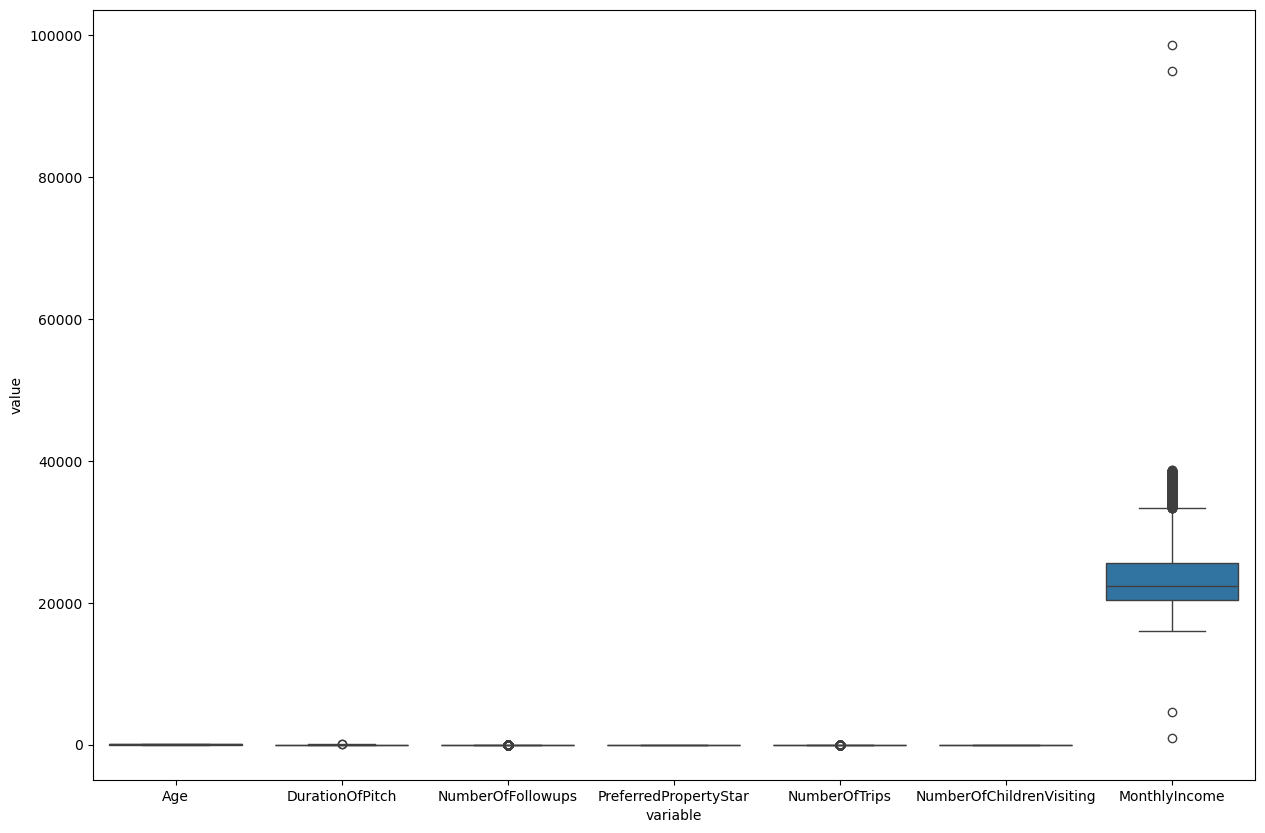

In [17]:
#temp.melt coverts data into format which is easy for a boxplot to plot.


plt.figure(figsize=(15,10))
sns.boxplot(x='variable',y='value',data=temp.melt())

plt.show()

In [17]:
temp.columns

Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

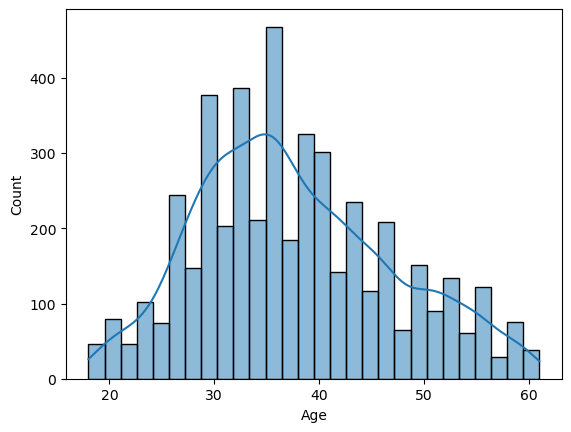

In [18]:
sns.histplot(data=temp['Age'],kde=True)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

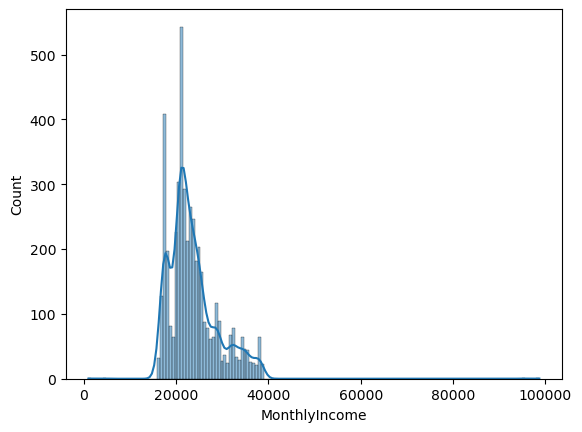

In [19]:
sns.histplot(data=temp['MonthlyIncome'],kde=True)

we use median to replace null values coz there was a little difference in mean and median, so to be on safe side we use median


In [20]:
temp.columns

Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [21]:
features_nan

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

# handling null values

In [22]:
df['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    2993
5.0     956
4.0     913
Name: count, dtype: int64

In [24]:
df['NumberOfChildrenVisiting'].value_counts()

NumberOfChildrenVisiting
1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: count, dtype: int64

In [25]:
df['MonthlyIncome'].value_counts()

MonthlyIncome
20855.0    7
21288.0    7
17342.0    7
21020.0    7
24950.0    6
          ..
17074.0    1
24250.0    1
21077.0    1
24714.0    1
21471.0    1
Name: count, Length: 2475, dtype: int64

In [26]:
# age
df['Age'].fillna(df['Age'].median(),inplace=True)

# compute mode for type of contact as it is discrete column
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)
# compute mode for number of followups as it is discrete column
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)
# mode for prefferedpropperrtystar coz its a discrete column
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0],inplace=True)

df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

/var/folders/ck/tj_z0jk1249ggvdcqp5pk2200000gn/T/ipykernel_977/4108097023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
/var/folders/ck/tj_z0jk1249ggvdcqp5pk2200000gn/T/ipykernel_977/4108097023.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [27]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [28]:
df.drop(columns= 'CustomerID',axis=1,inplace=True)

In [29]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

# feature engineering


## feature extraction

number of children visitng and number of person visiitng are two column and we can add these two columns to make one single column to reduce no of featues, coz they both can be added together


In [30]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']

In [30]:
df.drop(columns= ['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True)

In [31]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [32]:
df.shape

(4888, 20)

In [33]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [34]:
df['Designation'].dtype

dtype('O')

In [35]:
# get all numericfeatures
 
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [36]:
print("number of numeric features: ",len(num_features))

number of numeric features:  14


In [37]:
#get all categorical features 
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('number of categorical features: ',len(cat_features))

number of categorical features:  6


splitting num features further into discrete features and continuos features

In [38]:
# get all discrete features
discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print('number of discrete features: ',len(discrete_features))

number of discrete features:  11


In [39]:
continuos_features = [feature for feature in num_features if feature not in discrete_features]
print('number of continuos features: ',len(continuos_features))

number of continuos features:  3


In [40]:
y = df['ProdTaken']


In [41]:
X = df.drop(['ProdTaken'],axis=1)

In [42]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [43]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

ensemble techniques perform well in given imbalanced dataset, so it is fine

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
# create column transformer with 3 type of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# random forest mai standard scaler na bhi kren tab bh fine, but here just to show working of
# columnTransformer we are doing it

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

# one hot encoding always results in n+1 column in which one column is useless, so we dropping 1st column

pre_processor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScalar",numeric_transformer,num_features)

    ]
)



In [46]:
print(pre_processor)

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScalar', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])


In [47]:
X_train = pre_processor.fit_transform(X_train)
X_test = pre_processor.transform(X_test)


## Random Forest Classifier Training

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [49]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.3 MB/s eta 0:00:0000:0100:01


In [50]:
from xgboost import XGBClassifier

In [52]:
models = {
    # add other models here to see which model works best
    'RandomForest' : RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Xgboost': XGBClassifier()


}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # train the model

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc = roc_auc_score(y_train,y_train_pred)

    #test set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc = roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])

    print("Model performance for training set")
    print("Accuracy: ",round(model_train_accuracy,2))
    print("Precision: ",round(model_train_precision,2))
    print("Recall: ",round(model_train_recall,2))
    print("Roc auc Score: ",round(model_train_rocauc,2))

    print("-------------------------------------------")

    print("Model performance for test set")
    print("Accuracy: ",round(model_test_accuracy,2))
    print("Precision: ",round(model_test_precision,2))
    print("Recall: ",round(model_test_recall,2))
    print("Roc auc Score: ",round(model_test_rocauc,2))
    print("="*35)
    print("\n")





    



RandomForest
Model performance for training set
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Roc auc Score:  1.0
-------------------------------------------
Model performance for test set
Accuracy:  0.92
Precision:  0.95
Recall:  0.6
Roc auc Score:  0.8




/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost
Model performance for training set
Accuracy:  0.86
Precision:  0.73
Recall:  0.36
Roc auc Score:  0.67
-------------------------------------------
Model performance for test set
Accuracy:  0.84
Precision:  0.66
Recall:  0.32
Roc auc Score:  0.64


Xgboost
Model performance for training set
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Roc auc Score:  1.0
-------------------------------------------
Model performance for test set
Accuracy:  0.94
Precision:  0.95
Recall:  0.73
Roc auc Score:  0.86




In [77]:
# now whatever models performs best (give highest accuracy) do hyper-parameter tuning on it
rf_params = {
    "max_depth": [5,8,15,None,10],
    "max_features": [5,7,"auto",8],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}
adaboost_param = {
    "n_estimators" : [50,60,70,80,90],
    "algorithm": ['SAMME','SAMME.R']

}
xgboost_param = {
    "learning_rate": [0.1,0.01],
    "max_depth": [5,8,12,20,30],
    "n_estimators": [100,200,300],
    "colsample_bytree": [0.5,0.8,1,0.3,0.4]
}

#Model list for hyperparamter tuning

randomcv_models = [
    ('RF',RandomForestClassifier(),rf_params),
    ('ABA',AdaBoostClassifier(),adaboost_param),
    ('XGB',XGBClassifier(),xgboost_param)
    
]

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name,model,param in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=param,
                                n_iter=10,
                                cv=5,
                                verbose=2,
                                n_jobs=-1
                                )
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=1000; total time=  11.1s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=1000; total time=  11.1s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=1000; total time=  11.2s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=1000; total time=  11.2s
[CV] END max_depth=10, max_features=5, min_samples_split=20, n_estimators=1000; total time=  10.3s
[CV] END max_depth=10, max_features=5, min_samples_split=20, n_estimators=1000; total time=  10.3s
[CV] END max_depth=10, max_features=5, min_samples_split=20, n_estimators=1000; total time=  10.4s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=1000; total time=  10.7s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   3.9s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   3.8s
[CV] END max_depth=

/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.9s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.9s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.6s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.6s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.9s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.7s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.7s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.7s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.9s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.7s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.7s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.7s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.8s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.8s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.8s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.8s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   1.1s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   1.0s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   1.1s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   1.0s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.9s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   1.0s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.9s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=   1.1s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=   1.1s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=   1.2s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=   1.0s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=   1.0s


/Users/user/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300; total time=   1.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300; total time=   1.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300; total time=   1.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=300; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=300; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=300; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_

In [80]:
for model_name in model_param:
    print(f"---------best param for {model_name}----------")
    print(model_param[model_name])


---------best param for RF----------
{'n_estimators': 1000, 'min_samples_split': 15, 'max_features': 7, 'max_depth': None}
---------best param for ABA----------
{'n_estimators': 50, 'algorithm': 'SAMME.R'}
---------best param for XGB----------
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [81]:
model_param

{'RF': {'n_estimators': 1000,
  'min_samples_split': 15,
  'max_features': 7,
  'max_depth': None},
 'ABA': {'n_estimators': 50, 'algorithm': 'SAMME.R'},
 'XGB': {'n_estimators': 300,
  'max_depth': 8,
  'learning_rate': 0.1,
  'colsample_bytree': 1}}

In [82]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200,min_samples_split = 2,max_features=7,max_depth = None),
    "Adaboost Classifier": AdaBoostClassifier(n_estimators= 90, algorithm= 'SAMME'),
    "XGBoost": XGBClassifier(n_estimators = 300,max_depth=8,learning_rate=0.1,colsample_bytree=1)
    }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # train the model

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc = roc_auc_score(y_train,y_train_pred)

    #test set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc = roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])

    print("Model performance for training set")
    print("Accuracy: ",round(model_train_accuracy,2))
    print("Precision: ",round(model_train_precision,2))
    print("Recall: ",round(model_train_recall,2))
    print("Roc auc Score: ",round(model_train_rocauc,2))

    print("-------------------------------------------")

    print("Model performance for test set")
    print("Accuracy: ",round(model_test_accuracy,2))
    print("Precision: ",round(model_test_precision,2))
    print("Recall: ",round(model_test_recall,2))
    print("Roc auc Score: ",round(model_test_rocauc,2))
    print("="*35)
    print("\n")



Random Forest
Model performance for training set
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Roc auc Score:  1.0
-------------------------------------------
Model performance for test set
Accuracy:  0.92
Precision:  0.95
Recall:  0.64
Roc auc Score:  0.82


Adaboost Classifier
Model performance for training set
Accuracy:  0.85
Precision:  0.78
Recall:  0.26
Roc auc Score:  0.62
-------------------------------------------
Model performance for test set
Accuracy:  0.84
Precision:  0.78
Recall:  0.23
Roc auc Score:  0.6


XGBoost
Model performance for training set
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Roc auc Score:  1.0
-------------------------------------------
Model performance for test set
Accuracy:  0.95
Precision:  0.96
Recall:  0.78
Roc auc Score:  0.89


